In [1]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch.utils.data import Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import utils
import model

In [3]:
total=30
quizes, solutions = utils.loadDataset("sudoku_test.csv", total)

loaded 10 %
loaded 20 %
loaded 30 %
loaded 40 %
loaded 50 %
loaded 60 %
loaded 70 %
loaded 80 %
loaded 90 %
loaded 100 %
quizes
 (30, 9, 9) [[0. 8. 0. 0. 3. 2. 0. 0. 1.]
 [7. 0. 3. 0. 8. 0. 0. 0. 2.]
 [5. 0. 0. 0. 0. 7. 0. 3. 0.]
 [0. 5. 0. 0. 0. 1. 9. 7. 0.]
 [6. 0. 0. 7. 0. 9. 0. 0. 8.]
 [0. 4. 7. 2. 0. 0. 0. 5. 0.]
 [0. 2. 0. 6. 0. 0. 0. 0. 9.]
 [8. 0. 0. 0. 9. 0. 3. 0. 5.]
 [3. 0. 0. 8. 2. 0. 0. 1. 0.]]
solutions
 (30, 9, 9) [[4 8 9 5 3 2 7 6 1]
 [7 1 3 4 8 6 5 9 2]
 [5 6 2 9 1 7 8 3 4]
 [2 5 8 3 4 1 9 7 6]
 [6 3 1 7 5 9 2 4 8]
 [9 4 7 2 6 8 1 5 3]
 [1 2 5 6 7 3 4 8 9]
 [8 7 6 1 9 4 3 2 5]
 [3 9 4 8 2 5 6 1 7]]


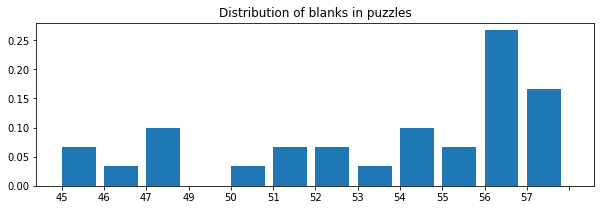

In [4]:
utils.drawBlanksDistribution(quizes, total)

In [5]:
solver = model.SudokuSolver(n=10, c_mid=100)
checkpoint = torch.load("sudoku_res2net_model.tar", map_location=torch.device('cpu'))
solver.model.load_state_dict(checkpoint['model_state_dict'])

cpu


<All keys matched successfully>

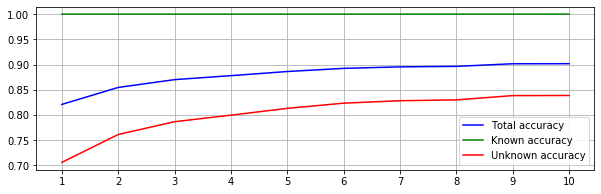

In [6]:
utils.plotAccuracy(checkpoint['total_accuracies'], checkpoint['known_accuracies'], checkpoint['unknown_accuracies'], 10)

In [7]:
total_accuracies, known_accuracies, unknown_accuracies, zeros_count = solver.get_accuracy(quizes, solutions, total, batch_size=1, start=0, end=total, iterative=True)
print(f"Total accuracy: {total_accuracies} on {total} tests")
print(f"Known accuracy: {known_accuracies} on {total} tests")
print(f"Unknown accuracy: {unknown_accuracies} on {total} tests")
print(f"Zeros count: {zeros_count} on {total} tests")

batch: 0, total_correct: [81/81], known_correct: [34/34], unknown_correct: [47/47], zeros in answer: 0
batch: 1, total_correct: [81/81], known_correct: [36/36], unknown_correct: [45/45], zeros in answer: 0
batch: 2, total_correct: [81/81], known_correct: [34/34], unknown_correct: [47/47], zeros in answer: 0
batch: 3, total_correct: [81/81], known_correct: [36/36], unknown_correct: [45/45], zeros in answer: 0
batch: 4, total_correct: [81/81], known_correct: [34/34], unknown_correct: [47/47], zeros in answer: 0
batch: 5, total_correct: [81/81], known_correct: [35/35], unknown_correct: [46/46], zeros in answer: 0
batch: 6, total_correct: [81/81], known_correct: [28/28], unknown_correct: [53/53], zeros in answer: 0
batch: 7, total_correct: [81/81], known_correct: [26/26], unknown_correct: [55/55], zeros in answer: 0
batch: 8, total_correct: [81/81], known_correct: [26/26], unknown_correct: [55/55], zeros in answer: 0
batch: 9, total_correct: [46/81], known_correct: [28/28], unknown_correct